# Loading Dataset :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data_review = pd.read_csv("amazon_reviews.csv")
data_review.head()

,title,body,rating
0,Disappointed For Product,I purchased this product at it hot delivered i...,1.0 out of 5 stars
1,Average action camera,Its not fully 4k cam as mentioned it is interp...,3.0 out of 5 stars
2,"Camera is good, cheated on mounts","Camera is absolutely nice, but the accesories ...",5.0 out of 5 stars
3,Unsatisfied product,"With in one year use it's battery exploded, ve...",1.0 out of 5 stars
4,Charging port is wrong. FPV port on camera whe...,The charging port is supposed to be mini USB b...,1.0 out of 5 stars


# EDA :

In [3]:
data_review["Rating"] = data_review["rating"].apply(lambda x : int(x[0]))
data_review.drop(["rating","title"], axis = 1, inplace = True)
data_review.rename(columns = {"body":"Review"}, inplace = True)
data_review.head()

,Review,Rating
0,I purchased this product at it hot delivered i...,1
1,Its not fully 4k cam as mentioned it is interp...,3
2,"Camera is absolutely nice, but the accesories ...",5
3,"With in one year use it's battery exploded, ve...",1
4,The charging port is supposed to be mini USB b...,1


In [4]:
data_review.shape

(398, 2)

In [5]:
data_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  396 non-null    object
 1   Rating  398 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


## Dropping Null-Values :

In [6]:
data_review.isnull().sum()

Review    2
Rating    0
dtype: int64

In [7]:
data_review.dropna()

,Review,Rating
0,I purchased this product at it hot delivered i...,1
1,Its not fully 4k cam as mentioned it is interp...,3
2,"Camera is absolutely nice, but the accesories ...",5
3,"With in one year use it's battery exploded, ve...",1
4,The charging port is supposed to be mini USB b...,1
...,...,...
393,"Packed well , and includes full kit 👍🏻",5
394,I wasnt really pessimist nor optimist on this ...,5
395,lots off mount and items are missing inside th...,1
396,this camera doesnt take audio recording with i...,1


## Cleaning the Dataset :

In [8]:
import nltk
import re

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
port = PorterStemmer()
def text_cleaner (text):
    cleaned= re.sub('[^a-zA-Z]', " ", text) 
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [port.stem (word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    return cleaned

In [10]:
data_review["Cleaned_review"]=data_review["Review"].apply(lambda x: text_cleaner(str(x)))
data_review.head()

,Review,Rating,Cleaned_review
0,I purchased this product at it hot delivered i...,1,purchas product hot deliv hour total disappoin...
1,Its not fully 4k cam as mentioned it is interp...,3,fulli k cam mention interpol re find record k ...
2,"Camera is absolutely nice, but the accesories ...",5,camera absolut nice accesori pathet wors quali...
3,"With in one year use it's battery exploded, ve...",1,one year use batteri explod bad expet amazon s...
4,The charging port is supposed to be mini USB b...,1,charg port suppos mini usb sj legend got seem ...


## Sorting Rating :

In [11]:
data_review["Rating"].value_counts().sort_index()

1     77
2     15
3     39
4     84
5    183
Name: Rating, dtype: int64

<AxesSubplot:ylabel='Rating'>

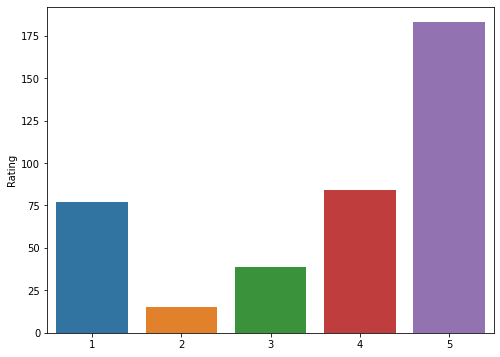

In [12]:
plt.figure(figsize = (8,6))
sns.barplot(x = data_review["Rating"].value_counts().index, y = data_review["Rating"].value_counts())

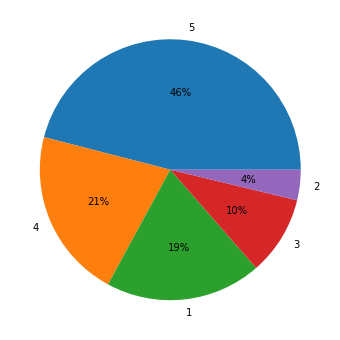

In [13]:
plt.figure(figsize = (8,6))
plt.pie(data_review["Rating"].value_counts(), labels = data_review["Rating"].value_counts().index, autopct="%.0f%%")
plt.show()

## Calculating Sentiment Value :

In [14]:
data = data_review[data_review["Rating"] != 3]
data.shape

(359, 3)

In [15]:
data["Sentiment"]= data["Rating"].map({1: 0, 2:0, 4: 1, 5:1})
data.head()

,Review,Rating,Cleaned_review,Sentiment
0,I purchased this product at it hot delivered i...,1,purchas product hot deliv hour total disappoin...,0
2,"Camera is absolutely nice, but the accesories ...",5,camera absolut nice accesori pathet wors quali...,1
3,"With in one year use it's battery exploded, ve...",1,one year use batteri explod bad expet amazon s...,0
4,The charging port is supposed to be mini USB b...,1,charg port suppos mini usb sj legend got seem ...,0
6,The media could not be loaded.\n ...,1,media could load bought sj legend novemb switc...,0


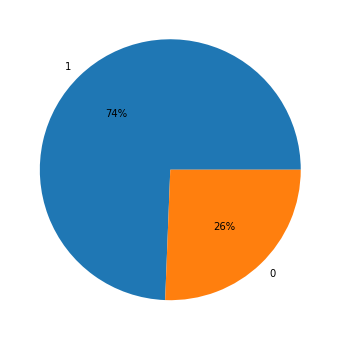

In [16]:
plt.figure(figsize=(8,6))
plt.pie(data["Sentiment"].value_counts(), labels = data["Sentiment"].value_counts().index, autopct="%.0f%%")
plt.show()

## Calculating Length of Review :

In [17]:
data["Length"] = data["Review"].apply(lambda x:len(str(x)))
data.head()

,Review,Rating,Cleaned_review,Sentiment,Length
0,I purchased this product at it hot delivered i...,1,purchas product hot deliv hour total disappoin...,0,231
2,"Camera is absolutely nice, but the accesories ...",5,camera absolut nice accesori pathet wors quali...,1,421
3,"With in one year use it's battery exploded, ve...",1,one year use batteri explod bad expet amazon s...,0,337
4,The charging port is supposed to be mini USB b...,1,charg port suppos mini usb sj legend got seem ...,0,294
6,The media could not be loaded.\n ...,1,media could load bought sj legend novemb switc...,0,495


<AxesSubplot:xlabel='Length', ylabel='Count'>

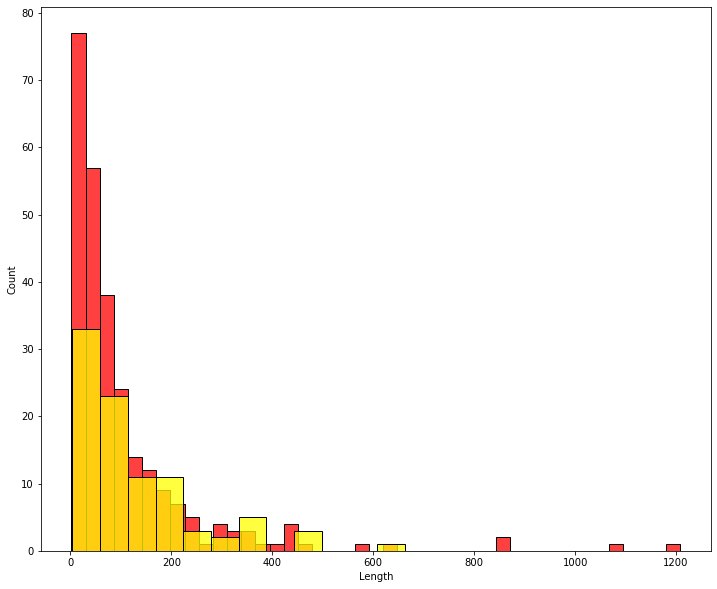

In [18]:
plt.figure(figsize=(12,10))
sns.histplot(data[data["Sentiment"]==1]['Length'], color="red")
sns.histplot(data[data["Sentiment"]==0]['Length'], color="yellow")

In [19]:
data.corr()

,Rating,Sentiment,Length
Rating,1.000000,0.961091,-0.069498
Sentiment,0.961091,1.000000,-0.064570
Length,-0.069498,-0.064570,1.000000


## Plotting Wordcloud : 

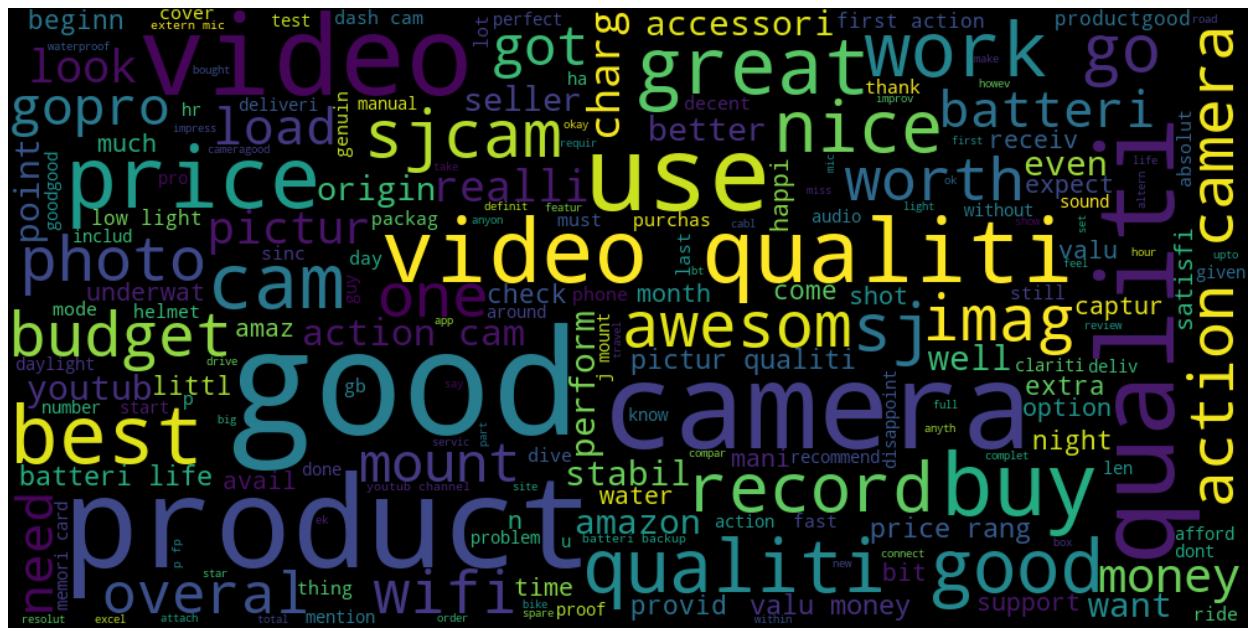

In [20]:
from wordcloud import WordCloud

allwords = data[data["Sentiment"]==1]["Cleaned_review"].str.cat(sep="")
wordCloud = WordCloud(width = 1000, height = 500, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

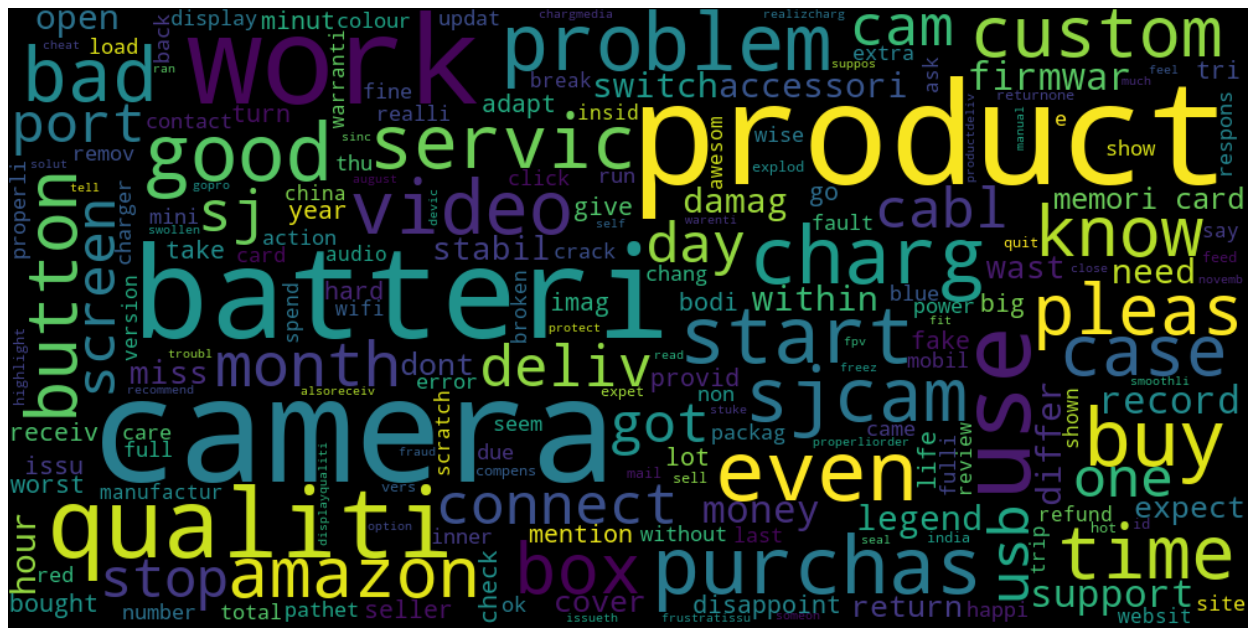

In [21]:
from wordcloud import WordCloud

allwords = data[data["Sentiment"]==0]["Cleaned_review"].str.cat(sep="")
wordCloud = WordCloud(width = 1000, height = 500, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Determining Sentiment Intensity by using Vader Method : 

In [22]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
sid  = SentimentIntensityAnalyzer()

In [94]:
data['Vader_Score'] = data["Cleaned_review"].apply(lambda review:sid.polarity_scores(review))
data.head()

,Review,Rating,Cleaned_review,Sentiment,Length,Vader_Score,Vader_Compound_Score,Result
0,I purchased this product at it hot delivered i...,1,purchas product hot deliv hour total disappoin...,0,231,"{'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'comp...",-0.4019,negative
2,"Camera is absolutely nice, but the accesories ...",5,camera absolut nice accesori pathet wors quali...,1,421,"{'neg': 0.184, 'neu': 0.668, 'pos': 0.148, 'co...",-0.4019,negative
3,"With in one year use it's battery exploded, ve...",1,one year use batteri explod bad expet amazon s...,0,337,"{'neg': 0.085, 'neu': 0.706, 'pos': 0.209, 'co...",0.4767,positive
4,The charging port is supposed to be mini USB b...,1,charg port suppos mini usb sj legend got seem ...,0,294,"{'neg': 0.087, 'neu': 0.833, 'pos': 0.08, 'com...",-0.0516,negative
6,The media could not be loaded.\n ...,1,media could load bought sj legend novemb switc...,0,495,"{'neg': 0.069, 'neu': 0.805, 'pos': 0.126, 'co...",0.3612,positive


In [29]:
data['Vader_Compound_Score']  = data['Vader_Score'].apply(lambda score_dict: score_dict['compound'])
data.head()

,Review,Rating,Cleaned_review,Sentiment,Length,Vader_Score,Vader_Compound_Score
0,I purchased this product at it hot delivered i...,1,purchas product hot deliv hour total disappoin...,0,231,"{'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'comp...",-0.4019
2,"Camera is absolutely nice, but the accesories ...",5,camera absolut nice accesori pathet wors quali...,1,421,"{'neg': 0.184, 'neu': 0.668, 'pos': 0.148, 'co...",-0.4019
3,"With in one year use it's battery exploded, ve...",1,one year use batteri explod bad expet amazon s...,0,337,"{'neg': 0.085, 'neu': 0.706, 'pos': 0.209, 'co...",0.4767
4,The charging port is supposed to be mini USB b...,1,charg port suppos mini usb sj legend got seem ...,0,294,"{'neg': 0.087, 'neu': 0.833, 'pos': 0.08, 'com...",-0.0516
6,The media could not be loaded.\n ...,1,media could load bought sj legend novemb switc...,0,495,"{'neg': 0.069, 'neu': 0.805, 'pos': 0.126, 'co...",0.3612


In [30]:
data['Result'] = data['Vader_Compound_Score'].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
data

,Review,Rating,Cleaned_review,Sentiment,Length,Vader_Score,Vader_Compound_Score,Result
0,I purchased this product at it hot delivered i...,1,purchas product hot deliv hour total disappoin...,0,231,"{'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'comp...",-0.4019,negative
2,"Camera is absolutely nice, but the accesories ...",5,camera absolut nice accesori pathet wors quali...,1,421,"{'neg': 0.184, 'neu': 0.668, 'pos': 0.148, 'co...",-0.4019,negative
3,"With in one year use it's battery exploded, ve...",1,one year use batteri explod bad expet amazon s...,0,337,"{'neg': 0.085, 'neu': 0.706, 'pos': 0.209, 'co...",0.4767,positive
4,The charging port is supposed to be mini USB b...,1,charg port suppos mini usb sj legend got seem ...,0,294,"{'neg': 0.087, 'neu': 0.833, 'pos': 0.08, 'com...",-0.0516,negative
6,The media could not be loaded.\n ...,1,media could load bought sj legend novemb switc...,0,495,"{'neg': 0.069, 'neu': 0.805, 'pos': 0.126, 'co...",0.3612,positive
...,...,...,...,...,...,...,...,...
393,"Packed well , and includes full kit 👍🏻",5,pack well includ full kit,1,38,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.2732,positive
394,I wasnt really pessimist nor optimist on this ...,5,wasnt realli pessimist optimist product receiv...,1,365,"{'neg': 0.06, 'neu': 0.539, 'pos': 0.401, 'com...",0.9304,positive
395,lots off mount and items are missing inside th...,1,lot mount item miss insid box open one friend ...,0,176,"{'neg': 0.081, 'neu': 0.758, 'pos': 0.162, 'co...",0.3818,positive
396,this camera doesnt take audio recording with i...,1,camera doesnt take audio record cover thu vide...,0,183,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [31]:
data.Result.value_counts()

positive    238
neutral      65
negative     56
Name: Result, dtype: int64

<AxesSubplot:>

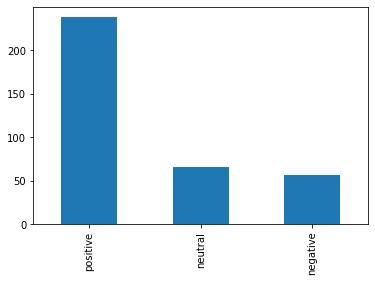

In [33]:
data.Result.value_counts().plot.bar()

# Model Evaluation :

## Splitting Dataset :

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [35]:
cv = CountVectorizer(binary = True)
cv.fit(data["Cleaned_review"])
X = cv.transform(data["Cleaned_review"]).toarray()
X.shape

(359, 993)

In [36]:
y = data.Sentiment.values
y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Balancing the Dataset :

In [38]:
from collections import Counter
from imblearn.combine import SMOTETomek

In [39]:
os = SMOTETomek(0.8)
X_train_ns,y_train_ns = os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 213, 0: 74})
The number of classes after fit Counter({1: 213, 0: 170})


In [40]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).

## Logistic Regression :

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [42]:
LR = LogisticRegression(multi_class = "multinomial", max_iter = 200)
LR.fit(X_train_ns,y_train_ns)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [43]:
y_predict = LR.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

LR_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
LR_precision = np.round(precision_score(y_test,y_predict),4)*100
LR_recall = np.round(recall_score(y_test,y_predict),4)*100
LR_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[12  6]
 [10 44]]


Accuracy Score :  0.7777777777777778
Precision Score :  0.88
Recall Score :  0.8148148148148148
F1_Score :  0.8461538461538461


## Naive Bayes :

Naive_Bayes -- BernoulliNB

In [44]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [45]:
bernoulli = BernoulliNB()

bernoulli.fit(X_train_ns,y_train_ns)
y_predict = bernoulli.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

BNB_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
BNB_precision = np.round(precision_score(y_test,y_predict),4)*100
BNB_recall = np.round(recall_score(y_test,y_predict),4)*100
BNB_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[13  5]
 [14 40]]


Accuracy Score :  0.7361111111111112
Precision Score :  0.8888888888888888
Recall Score :  0.7407407407407407
F1_Score :  0.808080808080808


Naive_Bayes -- ComplementNB

In [46]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [47]:
complement = ComplementNB()

complement.fit(X_train_ns,y_train_ns)
y_predict = complement.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

CNB_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
CNB_precision = np.round(precision_score(y_test,y_predict),4)*100
CNB_recall = np.round(recall_score(y_test,y_predict),4)*100
CNB_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[12  6]
 [ 6 48]]


Accuracy Score :  0.8333333333333334
Precision Score :  0.8888888888888888
Recall Score :  0.8888888888888888
F1_Score :  0.8888888888888888


Naive_Bayes -- GaussianNB

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [49]:
gaussian = GaussianNB()

gaussian.fit(X_train_ns,y_train_ns)
y_predict = gaussian.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

GNB_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
GNB_precision = np.round(precision_score(y_test,y_predict),4)*100
GNB_recall = np.round(recall_score(y_test,y_predict),4)*100
GNB_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[ 9  9]
 [11 43]]


Accuracy Score :  0.7222222222222222
Precision Score :  0.8269230769230769
Recall Score :  0.7962962962962963
F1_Score :  0.8113207547169811


Naive_Bayes -- MultinomialNB

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [51]:
multinomial = MultinomialNB()

gaussian.fit(X_train_ns,y_train_ns)
y_predict = gaussian.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

MNB_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
MNB_precision = np.round(precision_score(y_test,y_predict),4)*100
MNB_recall = np.round(recall_score(y_test,y_predict),4)*100
MNB_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[ 9  9]
 [11 43]]


Accuracy Score :  0.7222222222222222
Precision Score :  0.8269230769230769
Recall Score :  0.7962962962962963
F1_Score :  0.8113207547169811


## K-Means Clustering :

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

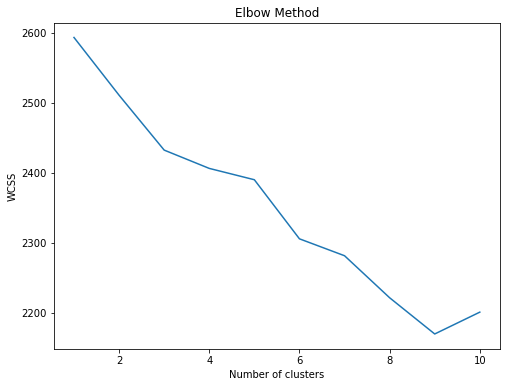

In [53]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X_train,y_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
clusters = KMeans(n_clusters=2)
clusters.fit(X_train_ns,y_train_ns)
y_predict = clusters.predict(X_test)

In [55]:
print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

K_Means_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
K_Means_precision = np.round(precision_score(y_test,y_predict),4)*100
K_Means_recall = np.round(recall_score(y_test,y_predict),4)*100
K_Means_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[18  0]
 [40 14]]


Accuracy Score :  0.4444444444444444
Precision Score :  1.0
Recall Score :  0.25925925925925924
F1_Score :  0.4117647058823529


## K-Nearest Neighbors : 

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

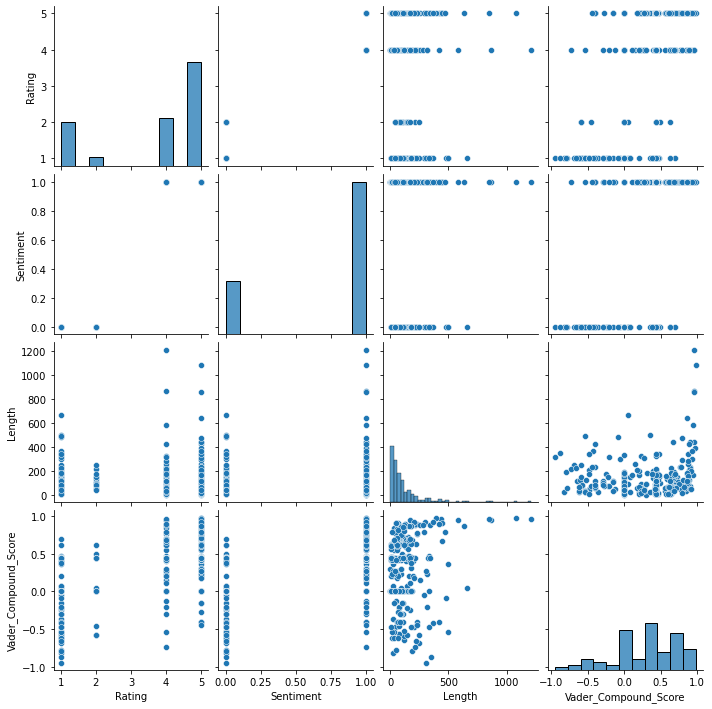

In [57]:
sns.pairplot(data = data)

In [58]:
KNN = KNeighborsClassifier(n_neighbors=1)

KNN.fit(X_train_ns,y_train_ns)
y_predict = KNN.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

KNeighbors_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
KNeighbors_precision = np.round(precision_score(y_test,y_predict),4)*100
KNeighbors_recall = np.round(recall_score(y_test,y_predict),4)*100
KNeighbors_f1 = np.round(f1_score(y_test,y_predict),4)*100

print("\n")
print(classification_report(y_test,y_predict))

[[12  6]
 [13 41]]


Accuracy Score :  0.7361111111111112
Precision Score :  0.8723404255319149
Recall Score :  0.7592592592592593
F1_Score :  0.8118811881188118


              precision    recall  f1-score   support

           0       0.48      0.67      0.56        18
           1       0.87      0.76      0.81        54

    accuracy                           0.74        72
   macro avg       0.68      0.71      0.69        72
weighted avg       0.77      0.74      0.75        72



## Decision Tree :

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [60]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X_train_ns,y_train_ns)

y_predict = model.predict(X_test)

In [61]:
print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

DT_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
DT_precision = np.round(precision_score(y_test,y_predict),4)*100
DT_recall = np.round(recall_score(y_test,y_predict),4)*100
DT_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[17  1]
 [32 22]]


Accuracy Score :  0.5416666666666666
Precision Score :  0.9565217391304348
Recall Score :  0.4074074074074074
F1_Score :  0.5714285714285714


## Ensemble Techniques :

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [63]:
RFC_model = RandomForestClassifier(n_estimators = 500, criterion="entropy")
RFC_model.fit(X_train_ns,y_train_ns)

y_predict = RFC_model.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

RFC_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
RFC_precision = np.round(precision_score(y_test,y_predict),4)*100
RFC_recall = np.round(recall_score(y_test,y_predict),4)*100
RFC_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[11  7]
 [ 7 47]]


Accuracy Score :  0.8055555555555556
Precision Score :  0.8703703703703703
Recall Score :  0.8703703703703703
F1_Score :  0.8703703703703703


In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [65]:
ABC_model = AdaBoostClassifier(n_estimators = 500)
ABC_model.fit(X_train_ns,y_train_ns)

y_predict = ABC_model.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

ABC_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
ABC_precision = np.round(precision_score(y_test,y_predict),4)*100
ABC_recall = np.round(recall_score(y_test,y_predict),4)*100
ABC_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[11  7]
 [ 8 46]]


Accuracy Score :  0.7916666666666666
Precision Score :  0.8679245283018868
Recall Score :  0.8518518518518519
F1_Score :  0.8598130841121496


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [67]:
GBC_model = GradientBoostingClassifier(n_estimators = 500)
GBC_model.fit(X_train_ns,y_train_ns)

y_predict = GBC_model.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

GBC_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
GBC_precision = np.round(precision_score(y_test,y_predict),4)*100
GBC_recall = np.round(recall_score(y_test,y_predict),4)*100
GBC_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[12  6]
 [12 42]]


Accuracy Score :  0.75
Precision Score :  0.875
Recall Score :  0.7777777777777778
F1_Score :  0.823529411764706


In [68]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [69]:
ETC_model = ExtraTreesClassifier(n_estimators = 500, criterion="entropy")
ETC_model.fit(X_train_ns,y_train_ns)

y_predict = ETC_model.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

ETC_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
ETC_precision = np.round(precision_score(y_test,y_predict),4)*100
ETC_recall = np.round(recall_score(y_test,y_predict),4)*100
ETC_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[11  7]
 [ 4 50]]


Accuracy Score :  0.8472222222222222
Precision Score :  0.8771929824561403
Recall Score :  0.9259259259259259
F1_Score :  0.9009009009009009


## SVM :

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [71]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [72]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7456896551724138)

In [73]:
clf = SVC(C = 0.1, gamma = 50)
clf.fit(X_train_ns , y_train_ns)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

SVM_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
SVM_precision = np.round(precision_score(y_test,y_predict),4)*100
SVM_recall = np.round(recall_score(y_test,y_predict),4)*100
SVM_f1 = np.round(f1_score(y_test,y_predict),4)*100

[[11  7]
 [ 4 50]]


Accuracy Score :  0.8472222222222222
Precision Score :  0.8771929824561403
Recall Score :  0.9259259259259259
F1_Score :  0.9009009009009009


## Voting Classifier :

In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [75]:
estimator = []
estimator.append(('LR_model', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))

estimator.append(('ETC_model', ExtraTreesClassifier(n_estimators=500)))

estimator.append(('RFC_model',RandomForestClassifier(n_estimators=500, random_state=42) ))

estimator.append(('CNB_model',ComplementNB() ))

model = VotingClassifier(estimators = estimator, voting ='hard')
model.fit(X_train_ns, y_train_ns)

VotingClassifier(estimators=[('LR_model',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('ETC_model',
                              ExtraTreesClassifier(n_estimators=500)),
                             ('RFC_model',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=42)),
                             ('CNB_model', ComplementNB())])

In [76]:
y_predict = model.predict(X_test)

In [77]:
print(confusion_matrix(y_test,y_predict))
print("\n")
print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Precision Score : ", precision_score(y_test,y_predict))
print("Recall Score : ", recall_score(y_test,y_predict))
print("F1_Score : ", f1_score(y_test,y_predict))

VC_accuracy = np.round(accuracy_score(y_test,y_predict),4)*100
VC_precision = np.round(precision_score(y_test,y_predict),4)*100
VC_recall = np.round(recall_score(y_test,y_predict),4)*100
VC_f1 = np.round(f1_score(y_test,y_predict),4)*100

print("\n")
print(classification_report(y_test,y_predict))

[[12  6]
 [ 8 46]]


Accuracy Score :  0.8055555555555556
Precision Score :  0.8846153846153846
Recall Score :  0.8518518518518519
F1_Score :  0.8679245283018868


              precision    recall  f1-score   support

           0       0.60      0.67      0.63        18
           1       0.88      0.85      0.87        54

    accuracy                           0.81        72
   macro avg       0.74      0.76      0.75        72
weighted avg       0.81      0.81      0.81        72



## Comparison of Models : 

In [78]:
#Compare the results 

compare_model = {"MODEL": pd.Series(["Logistic Regression","Naive_Bayes BernoulliNB","Naive_Bayes ComplementNB","Naive_Bayes GaussianNB","Naive_Bayes MultinominalNB","K-Means Clustering","K-Nearest Neighbors Classifier","Decision Tree","Random Forest Classifier","Adaboost Classifier","Gradient Boosting Classifier","Extra Trees Classifier","Support Vector Machines(SVM)","Voting Classifier"]),
                 "Accuracy Scores" : pd.Series([LR_accuracy, BNB_accuracy, CNB_accuracy, GNB_accuracy, MNB_accuracy, K_Means_accuracy, KNeighbors_accuracy, DT_accuracy, RFC_accuracy, ABC_accuracy, GBC_accuracy, ETC_accuracy, SVM_accuracy, VC_accuracy]),
                 "Precision Scores" : pd.Series([LR_precision, BNB_precision, CNB_precision, GNB_precision, MNB_precision, K_Means_precision, KNeighbors_precision, DT_precision, RFC_precision, ABC_precision, GBC_precision, ETC_precision, SVM_precision, VC_precision]),
                 "Recall Scores" : pd.Series([LR_recall, BNB_recall, CNB_recall, GNB_recall, MNB_recall, K_Means_recall, KNeighbors_recall, DT_recall, RFC_recall, ABC_recall, GBC_recall, ETC_recall, SVM_recall, VC_recall]),
                 "F1-Scores" : pd.Series([LR_f1, BNB_f1, CNB_f1, GNB_f1, MNB_f1, K_Means_f1, KNeighbors_f1, DT_f1, RFC_f1, ABC_f1, GBC_f1, ETC_f1, SVM_f1, VC_f1]),
                }
accuracy_table = pd.DataFrame(compare_model)
accuracy_table.sort_values(["Precision Scores"]) 

,MODEL,Accuracy Scores,Precision Scores,Recall Scores,F1-Scores
3,Naive_Bayes GaussianNB,72.22,82.69,79.63,81.13
4,Naive_Bayes MultinominalNB,72.22,82.69,79.63,81.13
9,Adaboost Classifier,79.17,86.79,85.19,85.98
8,Random Forest Classifier,80.56,87.04,87.04,87.04
6,K-Nearest Neighbors Classifier,73.61,87.23,75.93,81.19
10,Gradient Boosting Classifier,75.00,87.50,77.78,82.35
11,Extra Trees Classifier,84.72,87.72,92.59,90.09
12,Support Vector Machines(SVM),84.72,87.72,92.59,90.09
0,Logistic Regression,77.78,88.00,81.48,84.62
13,Voting Classifier,80.56,88.46,85.19,86.79


# Final Model : 

In [79]:
final_model = LogisticRegression(multi_class = "multinomial", max_iter = 200)
final_model.fit(X_train_ns,y_train_ns)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [80]:
final_model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1], dtype=int64)

In [86]:
#Confusion Matrix for model accuracy

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,final_model.predict(X_test))
print(confusion_matrix)

[[12  6]
 [10 44]]


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Model Score : ", final_model.score(X_test,y_test))

Accuracy Score :  0.8055555555555556
Model Score :  0.7777777777777778


In [89]:
print(classification_report(y_test,final_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60        18
           1       0.88      0.81      0.85        54

    accuracy                           0.78        72
   macro avg       0.71      0.74      0.72        72
weighted avg       0.80      0.78      0.78        72



In [90]:
import pickle

In [91]:
file = open("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science - Project P88\\NLP_Model.pkl", "wb")
pickle.dump(final_model , file)